In [37]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [7]:
# Load the dataset
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [6]:
# Inspect the dataset
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
# SHape of the dataset
df.shape

(244, 7)

In [9]:
# Information about the datsedataste
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [11]:
# Statisticall summary
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [12]:
# Check null values
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

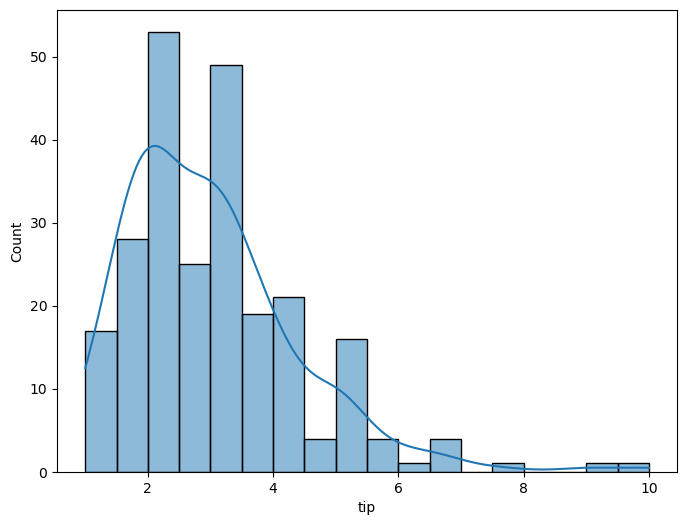

In [13]:
# Check if the dataset is normally distributed or not
plt.figure(figsize = (8, 6))
sns.histplot(df['tip'], kde = True)
plt.show()

In [38]:
# Find the answer of the question is the average tip on Sunday actually diferrent form the overall average
sunday_tips = df[df['day'] == 'Sun']['tip']

# Make the sample
small_sample = sunday_tips.sample(n = 15, random_state = 42)
small_sample


4      3.61
113    2.55
10     1.71
0      1.01
156    5.00
158    2.61
180    3.68
164    3.00
161    2.50
50     2.50
182    3.50
185    5.00
18     3.50
12     1.57
173    3.18
Name: tip, dtype: float64

In [39]:
# Mean 
x_bar = np.mean(small_sample)
x_bar, np.mean(df['tip'])

(np.float64(2.994666666666667), np.float64(2.99827868852459))

In [41]:
# Hypothesis testing
t_stat, p_value = stats.ttest_1samp(small_sample, 2.998)
print(f't-statistic :{t_stat:.4f}')
print(f'p-value : {p_value:.4f}')

t-statistic :-0.0114
p-value : 0.9910


In [43]:
df.groupby('day')['tip'].agg(['mean','median','count'])

C:\Users\HP\AppData\Local\Temp\ipykernel_7112\4227817550.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('day')['tip'].agg(['mean','median','count'])


,mean,median,count
day,,,
Thur,2.771452,2.305,62
Fri,2.734737,3.000,19
Sat,2.993103,2.750,87
Sun,3.255132,3.150,76


In [45]:
t_stat, p_value = stats.ttest_1samp(df[df['day'] == 'Fri']['tip'], 2.998)
print(f"Friday - t-stat: {t_stat:.4f}, p-value: {p_value:.4f}")

Friday - t-stat: -1.1255, p-value: 0.2752


In [48]:

t_stat, p_value = stats.ttest_1samp(small_sample, 2.998)
print(f"Sunday - t-stat: {t_stat:.4f}, p-value: {p_value:.4f}")

Sunday - t-stat: -0.0114, p-value: 0.9910
